# 4 Visualization

Visualizing the prediction period (22.6.2018 - 26.6.2018) as well as comparing to corresponding historical periods.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

In [99]:
def combine_historical_and_predicted(historical, prediction):
    """
    Concatenates historical and predicted time series data and 
    adds additional columns: datetime, year, weekday, sum.
    Returns a DataFrame.
    """
    historical["predicted"] = False
    prediction["predicted"] = True
    combined = pd.concat([historical, prediction])
    combined["date"] = combined.date.apply(pd.to_datetime)
    combined["year"] = combined.date.apply(lambda date: date.year)
    combined["datetime"] = combined.apply(lambda row: row.date + timedelta(hours=int(row.hour[:2])), axis=1)
    combined["week"] = combined.date.apply(lambda date: date.isocalendar()[1])
    combined["weekday"] = combined.date.apply(lambda date: date.weekday())
    combined.sort_values(by="datetime", inplace=True)
    combined.reset_index(drop=True, inplace=True)
    return combined

def plot_midsummer_comparison(data, historical_years=[2017], volyme_types=["Cars and Vans - 1", "Cars and Vans - 2"], location="Mäntsälä"):
    """
    Plot the target date volumes and compare to corresponding prediction for 2018.
    """
    years = historical_years + [2018]
    target_data = data[
        ((data["week"] == 25) & (data["weekday"].isin([3,4,5,6]))) |
        ((data["week"] == 26) & (data["weekday"].isin([0,1])))
    ]
    target_data = target_data.iloc[::3, :]
    fig, ax = plt.subplots(nrows=len(years), ncols=len(volyme_types), figsize=(20, 5*len(years)))
    plt.subplots_adjust(hspace = 0.5)
    i = 0
    for year in years:
        j = 0
        for volyme_type in volyme_types:
            axis = ax[i][j]
            if year == 2018:
                axis.set_title(location + " - {} predicted".format(year))
                target_data[target_data.year == year][["datetime"] + [volyme_type]].plot(x="datetime", ax=axis, color="orange")
            else:
                axis.set_title(location + " - {}".format(year))
                target_data[target_data.year == year][["datetime"] + [volyme_type]].plot(x="datetime", ax=axis)
            j += 1
        i += 1
    

In [100]:
# import ts datasets from csv files
historical = pd.read_csv("historical_ts.csv")
prediction = pd.read_csv("prediction_ts.csv")

In [101]:
# combine the historical and predicted datasets
combined = combine_historical_and_predicted(historical, prediction)

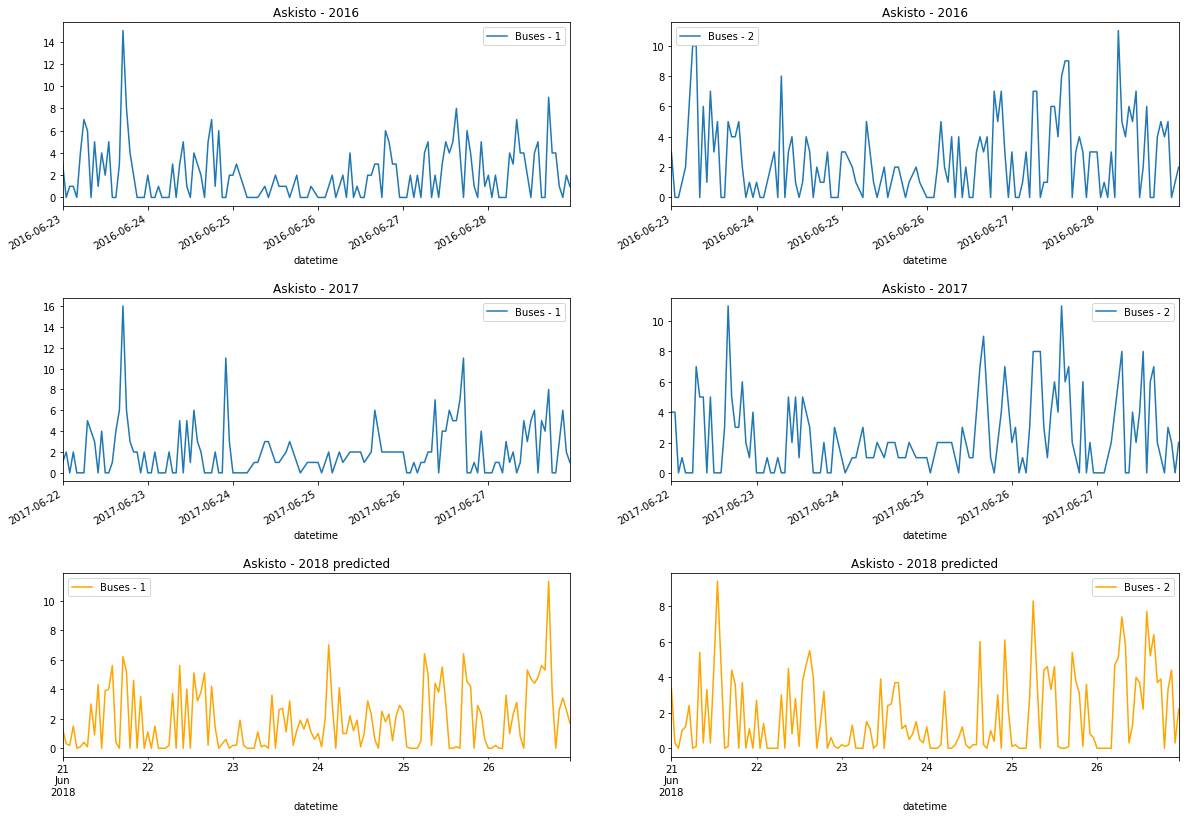

In [105]:
# plot comparison of midsummers 
plot_midsummer_comparison(combined, historical_years=[2016,2017], volyme_types=["Buses - 1", "Buses - 2"], location="Askisto")